# 1. Load Data

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("../data/advertising.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 2. DEA

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

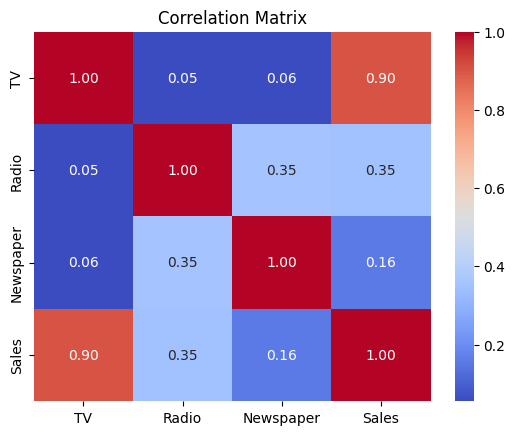

In [7]:

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

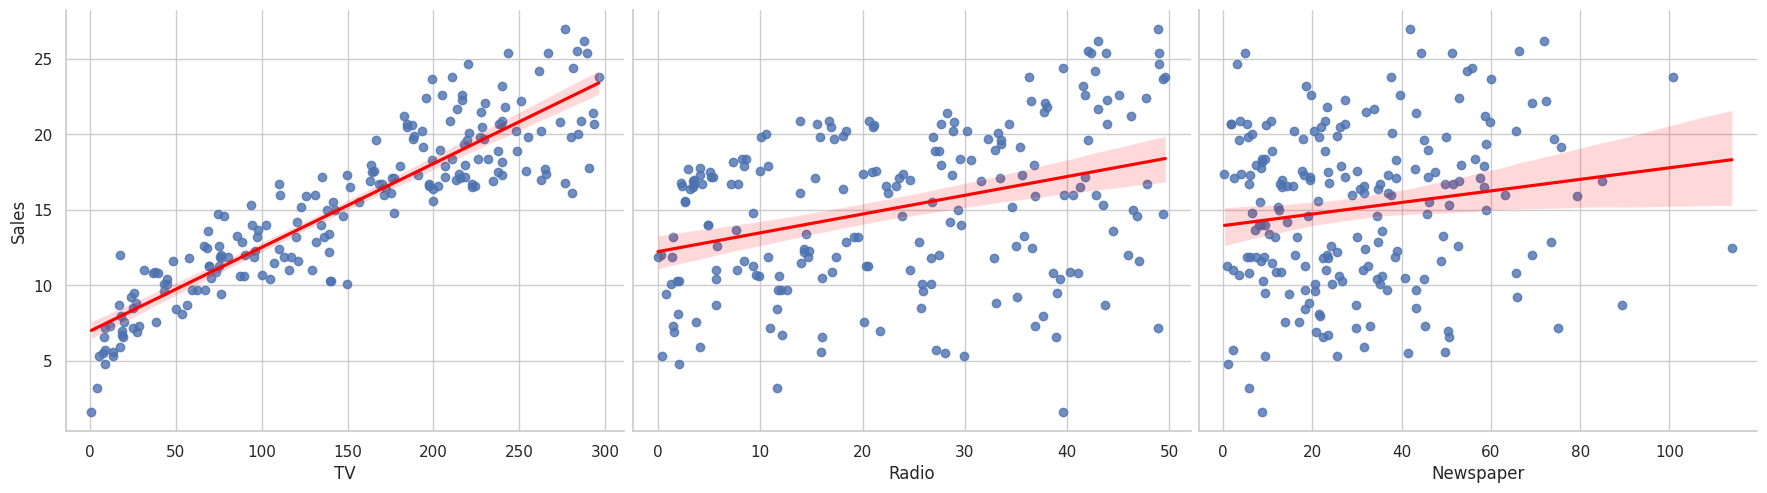

In [8]:
sns.set_theme(style="whitegrid")
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=1.2, kind='reg', plot_kws={'line_kws':{'color':'red'}})

plt.show()

# 3. Pre-processing

In [9]:
def split_data(X, Y, test_size=0.2):
    X = np.array(X)
    Y = np.array(Y)
    
    # 1. Get size
    data_size = X.shape[0]
    test_size = int(test_size * data_size)
    train_size = data_size - test_size

    # 2. Shuffle data
    indices = np.random.permutation(data_size)
    X = X[indices]
    Y = Y[indices]

    # 3. Split data
    X_train = X[:train_size]
    X_test = X[train_size:]
    Y_train = Y[:train_size]
    Y_test = Y[train_size:]

    return X_train, X_test, Y_train, Y_test

def data_scaler(X):
    X = np.array(X)
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_std[X_std == 0] = 1e-8
    X_scaled = (X - X_mean) / X_std

    return X_scaled, X_mean, X_std

def add_bias(X):
    return np.c_[np.ones(X.shape[0]), X]

In [10]:
X = df.drop("Sales", axis=1)
Y = df["Sales"]

In [11]:
X_train, X_test, Y_train, Y_test = split_data(X, Y, 0.15)
X_train, X_valid, Y_train, Y_valid = split_data(X_train, Y_train, 0.15)

print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("X_valid:", X_valid.shape)
print("Y_valid:", Y_valid.shape)
print("X_test", X_test.shape)
print("Y_test", Y_test.shape)


X_train: (145, 3)
Y_train: (145,)
X_valid: (25, 3)
Y_valid: (25,)
X_test (30, 3)
Y_test (30,)


In [12]:
X_scaled, X_mean, X_std = data_scaler(X_train)
X_scaled = add_bias(X_scaled)

# 4. Modeling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, data_X, data_Y, learning_rate, epochs, batch_size):
        self.data_X = data_X
        self.data_Y = data_Y
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.data_size = data_X.shape[0]

        self.theta = np.random.randn(self.data_X.shape[1])
        self.loss = []
        self.accuracy = []

    def compute_loss(self, y, y_pred):
        loss = (y - y_pred) * (y - y_pred)
        loss = np.mean(loss)
        return loss

    def compute_accuracy(self, y, y_pred):
        tss = np.sum((y - np.mean(y)) ** 2)
        rss = np.sum((y - y_pred) ** 2)

        return 1 - (rss / tss)

    def predict(self, X):
        y_pred = np.dot(X, self.theta)
        return y_pred

    def fit(self):
        for epoch in range(self.epochs):
            epoch_loss = []
            epoch_acc = []

            # 1. Shuffle data
            indices = np.random.permutation(self.data_size)
            X_shuffled = self.data_X[indices]
            Y_shuffled = self.data_Y[indices]

            for i in range(0, self.data_size, self.batch_size):
                # 2. Get batch data
                X_batch = X_shuffled[i:i + self.batch_size,:]
                Y_batch = Y_shuffled[i:i + self.batch_size]

                # 3. Predict
                y_pred = self.predict(X_batch)

                # 4. Compute Accuracy
                acc = self.compute_accuracy(Y_batch, y_pred)
                epoch_acc.append(acc)

                # 5. Compute Loss
                loss = self.compute_loss(Y_batch, y_pred)
                epoch_loss.append(loss)

                # 6. Gradient Descent
                k = 2*(y_pred - Y_batch)
                gradient = np.dot(X_batch.T, k) / self.batch_size

                # 7. Update theta
                self.theta = self.theta - self.learning_rate * gradient

            self.loss.append(np.mean(epoch_loss))
            self.accuracy.append(np.mean(epoch_acc))

            print(f"Epoch: {epoch} RMSE: {self.loss[-1]}, Acc:{self.accuracy[-1]} \n")

        response = f'Training Complete \n \
                    Theta: {self.theta}, \n \
                    RMSE: {self.loss[-1]}, \n \
                    Accuracy: {self.accuracy[-1]}'
        print(response)
        return 
        
    def plot(self):
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.plot(self.loss, color="red")
        plt.xlabel("Epochs")
        plt.ylabel("RMSE")

        plt.subplot(1, 2, 2)
        plt.plot(self.accuracy, color="blue")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")

        plt.show()

## 4.1 Fit model

Epoch: 0 RMSE: 284.83598579936864, Acc:-8.272601401891919 

Epoch: 1 RMSE: 239.2472957327655, Acc:-6.6779176775183355 

Epoch: 2 RMSE: 205.7364355706466, Acc:-6.554510155646232 

Epoch: 3 RMSE: 191.13190907150954, Acc:-5.069249278319473 

Epoch: 4 RMSE: 156.88095118345308, Acc:-3.872998467192403 

Epoch: 5 RMSE: 134.1878604335323, Acc:-3.578756196151512 

Epoch: 6 RMSE: 122.77706231511752, Acc:-2.8745347100650056 

Epoch: 7 RMSE: 103.75259589853108, Acc:-3.2023804492523062 

Epoch: 8 RMSE: 86.05510565402682, Acc:-1.6149697105235112 

Epoch: 9 RMSE: 76.60080270246874, Acc:-1.4699687384166633 

Epoch: 10 RMSE: 61.802475082837205, Acc:-1.6950287269627164 

Epoch: 11 RMSE: 60.67258655629111, Acc:-1.0997766299730276 

Epoch: 12 RMSE: 60.405960950551446, Acc:-1.1281417042152144 

Epoch: 13 RMSE: 47.28964040695517, Acc:-1.0653736977703385 

Epoch: 14 RMSE: 44.38156672079269, Acc:-1.250786997982567 

Epoch: 15 RMSE: 34.3632668429633, Acc:-0.3145731560926003 

Epoch: 16 RMSE: 33.299934633364046

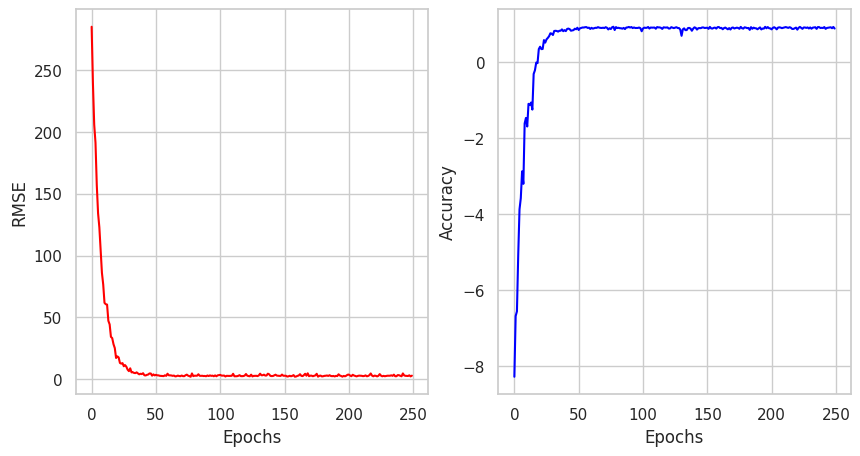

In [14]:
model = LinearRegression(
    data_X=X_scaled, 
    data_Y=Y_train, 
    learning_rate=0.03, 
    epochs=250, 
    batch_size=128)

model.fit()
model.plot()

## 4.2 Validation

In [15]:
X_valid_scaled = (X_valid - X_mean) / X_std
X_valid_scaled = add_bias(X_valid_scaled)

In [ ]:
theta = model.theta
y_pred = model.predict(X_valid_scaled)

In [17]:
accuracy = model.compute_accuracy(Y_valid, y_pred)
loss = model.compute_loss(Y_valid, y_pred)

print("Accuracy:", accuracy)
print("RMSE:", loss)

Accuracy: 0.8761093779522764
RMSE: 2.598559214577112


## 4.3 Evaluation

In [18]:
X_test_scaled = (X_test - X_mean) / X_std
X_test_scaled = add_bias(X_test_scaled)

In [ ]:
theta = model.theta
y_pred = model.predict(X_test_scaled)

In [20]:
accuracy = model.compute_accuracy(Y_test, y_pred)
loss = model.compute_loss(Y_test, y_pred)

print("Accuracy:", accuracy)
print("RMSE:", loss)

Accuracy: 0.9400133670149704
RMSE: 1.5696695588011251


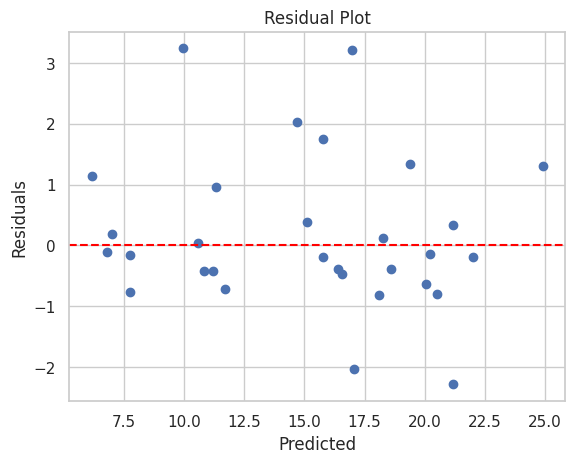

In [21]:
residuals = Y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

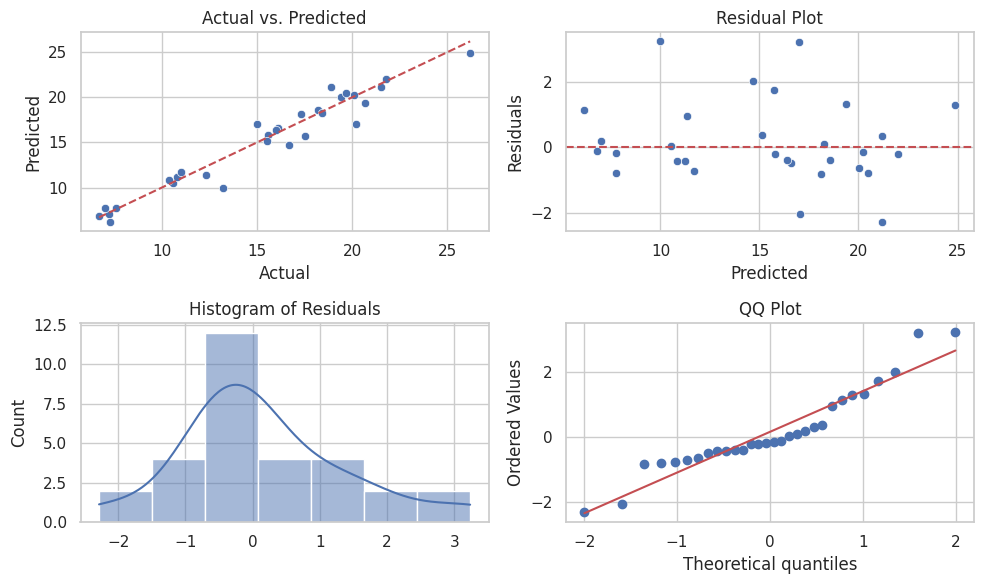

RMSE: 1.2529
MAE: 0.8974


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

def evaluate_model_comprehensive(y_true, y_pred):
    residuals = y_true - y_pred
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 6))

    # 1. Actual vs Predicted
    sns.scatterplot(x=y_true, y=y_pred, ax=axes[0, 0])
    axes[0, 0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    axes[0, 0].set_title('Actual vs. Predicted')
    axes[0, 0].set_xlabel('Actual')
    axes[0, 0].set_ylabel('Predicted')

    # 2. Residual Plot
    sns.scatterplot(x=y_pred, y=residuals, ax=axes[0, 1])
    axes[0, 1].axhline(0, color='r', linestyle='--')
    axes[0, 1].set_title('Residual Plot')
    axes[0, 1].set_xlabel('Predicted')
    axes[0, 1].set_ylabel('Residuals')

    # 3. Histogram of Residuals
    sns.histplot(residuals, kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('Histogram of Residuals')

    # 4. QQ Plot
    stats.probplot(residuals, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('QQ Plot')

    plt.tight_layout()
    plt.show()

    # In các chỉ số
    print(f"RMSE: {np.sqrt(np.mean(residuals**2)):.4f}")
    print(f"MAE: {np.mean(np.abs(residuals)):.4f}")

# Gọi hàm
evaluate_model_comprehensive(Y_test, y_pred)